### 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import scipy

%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 2. Meet and greet data

In [2]:
dataset = pd.read_csv("Dane do zadania.csv")
print("="*30)
print('Data description')
print("-"*10)
dataset.info()
print('='*30)
print('Missing data information, NaNs per column')
print("-"*10)
print(dataset.isnull().sum())

Data description
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb

In [3]:
dataset.sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1106,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46815748.0,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,12161,William Lucking,1.0,criminal|rafting|river|robber|white water rafting,http://www.imdb.com/title/tt0110997/?ref_=fn_t...,69.0,English,USA,PG-13,45000000.0,1994.0,894.0,6.3,2.35,0
991,Color,Garry Marshall,93.0,119.0,0.0,434.0,Felicity Huffman,627.0,37486138.0,Comedy|Drama|Romance,Amber Valletta,Raising Helen,30890,2052,Spencer Breslin,1.0,fashion show|female protagonist|love|pastor|qu...,http://www.imdb.com/title/tt0350028/?ref_=fn_t...,106.0,English,USA,PG-13,50000000.0,2004.0,508.0,6.0,1.85,718
2015,NaN,Mario Van Peebles,7.0,100.0,535.0,399.0,Mario Van Peebles,668.0,NaN,Action|Thriller,Martin Kove,Red Sky,1084,2204,Jacob Vargas,0.0,exploding airplane|fighter pilot|hands tied|he...,http://www.imdb.com/title/tt1946381/?ref_=fn_t...,11.0,English,USA,PG-13,25000000.0,2014.0,535.0,4.1,NaN,437
2984,Color,Spike Lee,30.0,108.0,0.0,599.0,Debi Mazar,873.0,4903000.0,Comedy|Drama,Michael Imperioli,Girl 6,4961,4497,Gretchen Mol,3.0,actress|neighbor|phone sex|queens new york cit...,http://www.imdb.com/title/tt0116414/?ref_=fn_t...,33.0,English,USA,R,12000000.0,1996.0,680.0,5.0,1.85,251
4038,Color,Eric Styles,16.0,92.0,4.0,405.0,Rupert Graves,631.0,7680.0,Drama|Romance,Samantha Morton,Dreaming of Joseph Lees,704,2020,Miriam Margolyes,0.0,love crime|love triangle|lust|sister sister re...,http://www.imdb.com/title/tt0144178/?ref_=fn_t...,18.0,English,USA,R,2000000.0,1999.0,443.0,6.4,NaN,100
507,Color,Andrés Couturier,3.0,89.0,0.0,20.0,David Hoffman,163.0,NaN,Animation|Family,Sariann Monaco,Top Cat Begins,230,370,Ben Diskin,0.0,NaN,http://www.imdb.com/title/tt4057916/?ref_=fn_t...,1.0,Spanish,Mexico,PG,8000000.0,2015.0,94.0,4.4,NaN,138
3477,Black and White,George Clooney,351.0,93.0,0.0,566.0,Tate Donovan,21000.0,31501218.0,Biography|Drama|History,Robert Downey Jr.,"Good Night, and Good Luck.",84070,22745,Alex Borstein,0.0,cbs|expose|fear|paranoia|reporter,http://www.imdb.com/title/tt0433383/?ref_=fn_t...,526.0,English,USA,PG,7500000.0,2005.0,650.0,7.5,1.85,0
4472,Color,Craig Moss,16.0,82.0,19.0,134.0,Bryan Callen,700.0,NaN,Comedy,Noureen DeWulf,The 41-Year-Old Virgin Who Knocked Up Sarah Ma...,5579,1499,Matt Crabtree,3.0,masturbation|porn actor in mainstream movie|se...,http://www.imdb.com/title/tt1498870/?ref_=fn_t...,42.0,English,USA,R,1300000.0,2010.0,460.0,2.7,1.85,0
2782,Color,Mike Nawrocki,38.0,82.0,12.0,8.0,Mike Nawrocki,23.0,25571351.0,Adventure|Animation|Comedy|Drama|Family|Musical,Phil Vischer,Jonah: A VeggieTales Movie,3135,49,Shelby Vischer,0.0,anthropomorphism|pirate|pirate ship|tomato|whale,http://www.imdb.com/title/tt0298388/?ref_=fn_t...,78.0,English,USA,G,14000000.0,2002.0,12.0,6.6,1.85,184
96,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,Matthew McConaughey,Interstellar,928227,31488,Mackenzie Foy,1.0,black hole|father daughter relationship|saving...,http://www.imdb.com/title/tt0816692/?ref_=fn_t...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [4]:
dataset[dataset.duplicated()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2.0,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_t...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Breaking Dawn - Part 2,185394,59177,Taylor Lautner,3.0,battle|friend|super strength|vampire|vision,http://www.imdb.com/title/tt1673434/?ref_=fn_t...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0.0,blood|godzilla|monster|sequel,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,Hugh Jackman,Pan,39956,21393,Nonso Anozie,4.0,1940s|child hero|fantasy world|orphan|referenc...,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,Tim Blake Nelson,Fantastic Four,110486,1261,Tim Heidecker,3.0,box office flop|critically bashed|portal|telep...,http://www.imdb.com/title/tt1502712/?ref_=fn_t...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,Paul Walker,The Fast and the Furious,272223,45327,Jordana Brewster,2.0,eighteen wheeler|illegal street racing|truck|t...,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,Dwayne Johnson,Hercules,115687,16235,Ingrid Bolsø Berdal,0.0,army|greek mythology|hercules|king|mercenary,http://www.imdb.com/title/tt1267297/?ref_=fn_t...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,Ronny Cox,Total Recall,240241,1441,Marshall Bell,0.0,ambiguous ending|false memory|implanted memory...,http://www.imdb.com/title/tt0100802/?ref_=fn_t...,391.0,English,USA,R,65000000.0,1990.0,308.0,7.5,1.85,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,Finn Wittrock,Unbroken,103589,2938,Alex Russell,0.0,emaciation|male nudity|plane crash|prisoner of...,http://www.imdb.com/title/tt1809398/?ref_=fn_t...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,7.2,2.35,35000


In [5]:
# data duplicates removal
dataset.drop_duplicates(inplace=True)

# 1.  Data exploration
## 1. Qualitative data

Qualitative data is not easy to use for clustering problems. We have to encode it in some way or remove it entirely:
-  one-hot-encoding - we code each unique value as a new feature with value of 1/0 for each object
-  continuous feature - we code each feature in some set of numbers that can be compared. A questionable solution for clustering problem as usually those will be several discrete values that will of themselves separate data in some clusters

In [6]:
def describe_qualitative(df, column_name):
    print('Feature description: %s' % column_name)
    print('    Number of unique values: %d' % df[column_name].nunique())
    print('    Missing data: %d' % df[column_name].isnull().sum())
    print('-'*20)
    print('10 most common values')
    print('-'*20)
    print(df[column_name].value_counts().head(10))
    print('='*40)

In [7]:
qualitative = ['color', 'director_name' , 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', \
              'movie_imdb_link', 'language', 'country', 'content_rating', 'title_year', 'aspect_ratio']
for feature in qualitative:
     describe_qualitative(dataset, feature)   

Feature description: color
    Number of unique values: 2
    Missing data: 19
--------------------
10 most common values
--------------------
Color               4772
 Black and White     207
Name: color, dtype: int64
Feature description: director_name
    Number of unique values: 2398
    Missing data: 103
--------------------
10 most common values
--------------------
Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
Steven Soderbergh    16
Tim Burton           16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Name: director_name, dtype: int64
Feature description: actor_2_name
    Number of unique values: 3032
    Missing data: 13
--------------------
10 most common values
--------------------
Morgan Freeman         20
Charlize Theron        15
Brad Pitt              13
James Franco           11
Meryl Streep           11
Adam Sandler           10
Robert Duvall           9
Angelina Jolie Pi

In [8]:
print (dataset['genres'].str.split('|', expand=True).stack().unique())

['Action' 'Adventure' 'Fantasy' 'Sci-Fi' 'Thriller' 'Documentary'
 'Romance' 'Animation' 'Comedy' 'Family' 'Musical' 'Mystery' 'Western'
 'Drama' 'History' 'Sport' 'Crime' 'Horror' 'War' 'Biography' 'Music'
 'Game-Show' 'Reality-TV' 'News' 'Short' 'Film-Noir']


### Qualitative data analysis

After looking through those description those are my conclusions.
Features to drop from clustering analysis:
-  movie_imdb_link - this feature does not have any information for clustering analysis, but it shows we still have some duplicates in the database
-  movie_title - similar to movie_imdb_link, although there might be some different movies with the same name.
-  plot_keywords - too many unique values even before splitting it into separate classes. 
-  content_rating - too many unique values for one-hot-encoding and no way to encode it as continuous number range
-  language - 47 unique values, too many for one-hot-encoding
-  country - 65 unique values, again too many for one-hot-encoding. Potentially we could group countries by continents, but there will be still 6 different categories and this does not make much sense for movies china movies are very different from idian bollywood cinema
-  aspect_ratio - 22 unique values, too many for one-hot-encoding
-  title_year - 106 unique values. It might be encoded as a continuous range of numbers - age of the movie.
-  genres - this column looks standardized, but has 26 unique values, which if one-hot-encoded would add 26 features for analysis. I think it can be used later after clustering the data to analyse it.
<br>

Remaining columns and fixing missing columns:
-  color - we can one-hot-encode this information using only one feature 'is_color', missing data will be assigned value of 1 (color) as this is most common/probably category
-  director_name - this column can be encodeded by counting how many time every director's name repeats in this dataset. This would give us values for each row. NaNs can be converted to 'Unknown' and give value of 0 for encoding. 
-  actor_1_name - same as director_name
-  actor_2_name - same as director_name
-  actor_3_name - same as director_name
I would say right now none of those features has any predictive power, but I'll keep it for analysis.

Also after analysing data and movie_imdb_link feature I concluded there is still some duplicated information in the database. As movie_imdb_link should be unique to each movie and there should not be to different movies with the same link, I'll use it to find and remove those duplicates.

In [9]:
dataset[dataset['movie_title'].str.contains('King Kong')]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
25,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316018,7123,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0
2049,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316020,7122,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,918.0,7.2,2.35,0
4694,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316027,7122,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,918.0,7.2,2.35,0


In [10]:
dataset.drop_duplicates(inplace = True, subset = ['movie_imdb_link'])

In [11]:
dataset[dataset['movie_title'].str.contains('King Kong')]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
25,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316018,7123,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0


### Qualitative data encoding

In [12]:
# 'color' feature encoding, new column "is_color":  1 = color, 0 = b&w
dataset['color'].fillna('Color', inplace = True)
dataset['is_color'] = dataset.apply(lambda row: 1 if row['color'] == 'Color' else 0, axis = 1)

In [13]:
def encode_frequency(df, column_name, new_column_name):
    df[column_name].fillna('Unknown', inplace = True)
    count = df[column_name].value_counts()
    df[new_column_name] = df.apply(lambda row: 0 if row[column_name] == 'Unknown' else count[row[column_name]], axis = 1)

In [14]:
# 'director_name' encoding, new column "director_count"
encode_frequency(dataset, 'director_name', 'director_count')

In [15]:
# "actor_1_name" encoding, new column "actor_1_count"
encode_frequency(dataset, 'actor_1_name', 'actor_1_count')

In [16]:
# "actor_2_name" encoding, new column "actor_2_count"
encode_frequency(dataset, 'actor_2_name', 'actor_2_count')

In [17]:
# "actor_3_name" encoding, new column "actor_3_count"
encode_frequency(dataset, 'actor_3_name', 'actor_3_count')

## 2. Quantitive data

In [18]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_color,director_count,actor_1_count,actor_2_count,actor_3_count
count,4870.000000,4904.000000,4817.000000,4896.000000,4912.000000,4.056000e+03,4.919000e+03,4919.000000,4906.000000,4898.000000,4.434000e+03,4813.000000,4906.000000,4919.000000,4593.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000
mean,138.010267,107.089111,690.705418,630.961397,6490.875814,4.762156e+07,8.261820e+04,9574.645863,1.376478,267.603512,3.928822e+07,2002.445045,1621.071545,6.437874,2.222105,7345.293556,0.958528,4.048181,8.028054,2.668835,1.930880
std,120.253857,25.278583,2832.107042,1625.428769,15103.081835,6.736387e+07,1.382858e+05,18159.992290,2.023493,372.839155,2.085579e+08,12.453460,4010.222585,1.127606,1.402514,19200.708189,0.199399,4.097023,9.349046,2.346531,1.369102
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,5.008728e+06,8.356500e+03,1394.000000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,108.000000,103.000000,48.000000,365.500000,982.000000,2.503566e+07,3.315800e+04,3044.000000,1.000000,153.500000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,160.000000,1.000000,3.000000,4.000000,2.000000,1.000000
75%,191.000000,118.000000,190.000000,633.000000,11000.000000,6.109941e+07,9.375750e+04,13611.500000,2.000000,320.000000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000,1.000000,5.000000,12.000000,3.000000,2.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,1.000000,26.000000,48.000000,18.000000,8.000000


In [19]:
quantity = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', \
           'actor_2_facebook_likes', 'actor_3_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', \
           'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'imdb_score', 'movie_facebook_likes', 'is_color', \
           'director_count', 'actor_1_count', 'actor_2_count', 'actor_3_count']

In [20]:
def describe_quantity(df, column_name):
    print('='*40)
    print('Feature description: %s' % column_name)
    print('    Number of unique values: %d' % df[column_name].nunique())
    
    missing = df[column_name].isnull().sum()
    if missing > 0:
        percent = missing / float(df.shape[0]) * 100
        print('    Missing data: %d (%f %%)' % (missing, percent))
    else:
        print('    Data complete!')
        
    print('-'*20)
    print('mode       %d' % df[column_name].mode()[0])
    print(df[column_name].describe())
    sns.distplot(df[column_name][~df[column_name].isnull()], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    plt.show()

Feature description: num_critic_for_reviews
    Number of unique values: 528
    Missing data: 49 (0.996137 %)
--------------------
mode       1
count    4870.000000
mean      138.010267
std       120.253857
min         1.000000
25%        49.000000
50%       108.000000
75%       191.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64


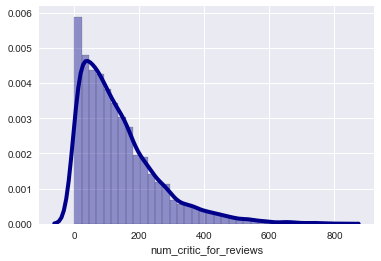

Feature description: duration
    Number of unique values: 191
    Missing data: 15 (0.304940 %)
--------------------
mode       90
count    4904.000000
mean      107.089111
std        25.278583
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64


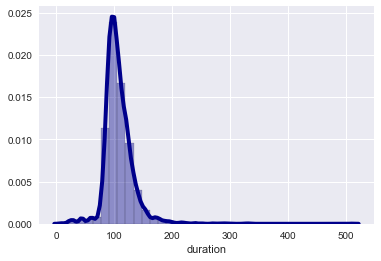

Feature description: director_facebook_likes
    Number of unique values: 435
    Missing data: 102 (2.073592 %)
--------------------
mode       0
count     4817.000000
mean       690.705418
std       2832.107042
min          0.000000
25%          7.000000
50%         48.000000
75%        190.000000
max      23000.000000
Name: director_facebook_likes, dtype: float64


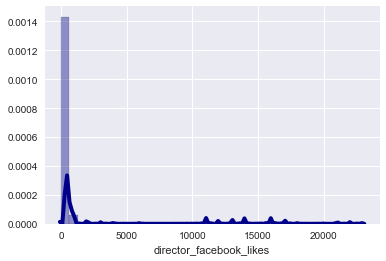

Feature description: actor_1_facebook_likes
    Number of unique values: 877
    Missing data: 7 (0.142305 %)
--------------------
mode       1000
count      4912.000000
mean       6490.875814
std       15103.081835
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64


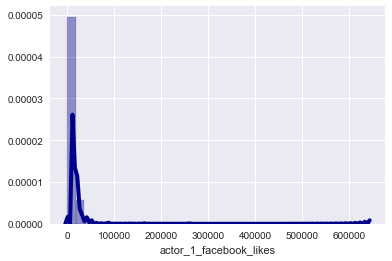

Feature description: actor_2_facebook_likes
    Number of unique values: 917
    Missing data: 13 (0.264281 %)
--------------------
mode       1000
count      4906.000000
mean       1621.071545
std        4010.222585
min           0.000000
25%         277.000000
50%         593.000000
75%         912.000000
max      137000.000000
Name: actor_2_facebook_likes, dtype: float64


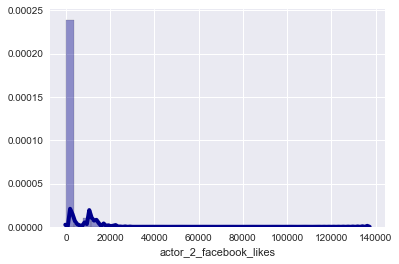

Feature description: actor_3_facebook_likes
    Number of unique values: 906
    Missing data: 23 (0.467575 %)
--------------------
mode       1000
count     4896.000000
mean       630.961397
std       1625.428769
min          0.000000
25%        132.000000
50%        365.500000
75%        633.000000
max      23000.000000
Name: actor_3_facebook_likes, dtype: float64


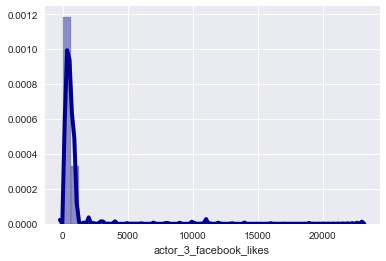

Feature description: gross
    Number of unique values: 4035
    Missing data: 863 (17.544216 %)
--------------------
mode       3000000
count    4.056000e+03
mean     4.762156e+07
std      6.736387e+07
min      1.620000e+02
25%      5.008728e+06
50%      2.503566e+07
75%      6.109941e+07
max      7.605058e+08
Name: gross, dtype: float64


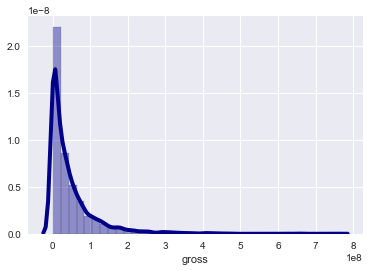

Feature description: num_voted_users
    Number of unique values: 4753
    Data complete!
--------------------
mode       57
count    4.919000e+03
mean     8.261820e+04
std      1.382858e+05
min      5.000000e+00
25%      8.356500e+03
50%      3.315800e+04
75%      9.375750e+04
max      1.689764e+06
Name: num_voted_users, dtype: float64


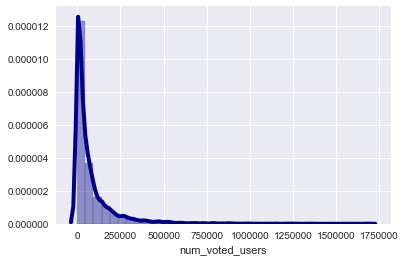

Feature description: cast_total_facebook_likes
    Number of unique values: 3961
    Data complete!
--------------------
mode       0
count      4919.000000
mean       9574.645863
std       18159.992290
min           0.000000
25%        1394.000000
50%        3044.000000
75%       13611.500000
max      656730.000000
Name: cast_total_facebook_likes, dtype: float64


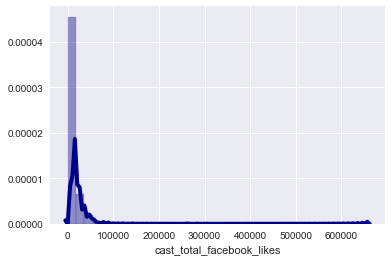

Feature description: facenumber_in_poster
    Number of unique values: 19
    Missing data: 13 (0.264281 %)
--------------------
mode       0
count    4906.000000
mean        1.376478
std         2.023493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64


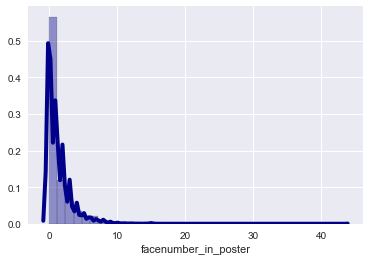

Feature description: num_user_for_reviews
    Number of unique values: 954
    Missing data: 21 (0.426916 %)
--------------------
mode       1
count    4898.000000
mean      267.603512
std       372.839155
min         1.000000
25%        64.000000
50%       153.500000
75%       320.000000
max      5060.000000
Name: num_user_for_reviews, dtype: float64


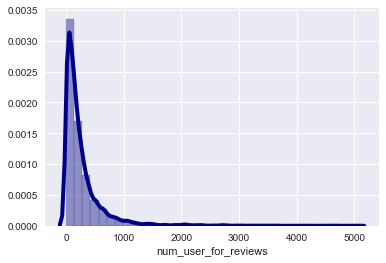

Feature description: budget
    Number of unique values: 439
    Missing data: 485 (9.859728 %)
--------------------
mode       20000000
count    4.434000e+03
mean     3.928822e+07
std      2.085579e+08
min      2.180000e+02
25%      6.000000e+06
50%      1.985000e+07
75%      4.300000e+07
max      1.221550e+10
Name: budget, dtype: float64


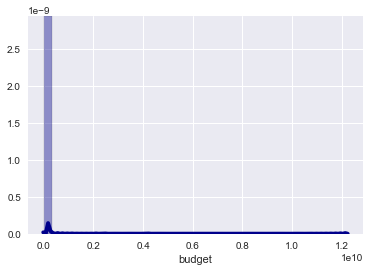

Feature description: imdb_score
    Number of unique values: 78
    Data complete!
--------------------
mode       6
count    4919.000000
mean        6.437874
std         1.127606
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64


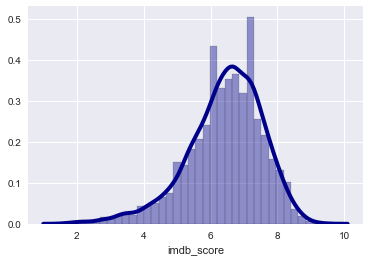

Feature description: movie_facebook_likes
    Number of unique values: 876
    Data complete!
--------------------
mode       0
count      4919.000000
mean       7345.293556
std       19200.708189
min           0.000000
25%           0.000000
50%         160.000000
75%        2000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64


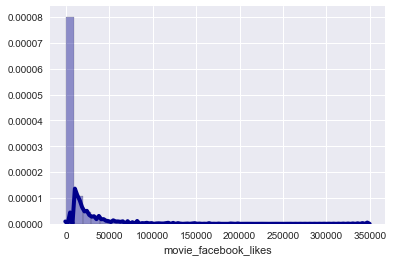

Feature description: is_color
    Number of unique values: 2
    Data complete!
--------------------
mode       1
count    4919.000000
mean        0.958528
std         0.199399
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_color, dtype: float64


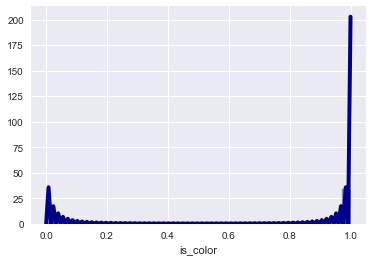

Feature description: director_count
    Number of unique values: 20
    Data complete!
--------------------
mode       1
count    4919.000000
mean        4.048181
std         4.097023
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        26.000000
Name: director_count, dtype: float64


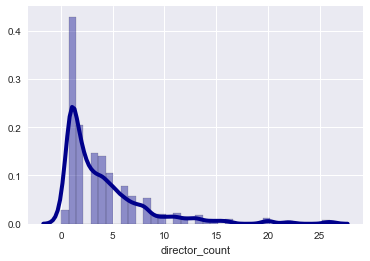

Feature description: actor_1_count
    Number of unique values: 33
    Data complete!
--------------------
mode       1
count    4919.000000
mean        8.028054
std         9.349046
min         0.000000
25%         1.000000
50%         4.000000
75%        12.000000
max        48.000000
Name: actor_1_count, dtype: float64


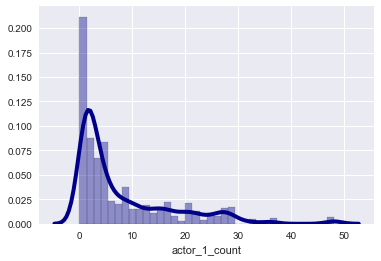

Feature description: actor_2_count
    Number of unique values: 15
    Data complete!
--------------------
mode       1
count    4919.000000
mean        2.668835
std         2.346531
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        18.000000
Name: actor_2_count, dtype: float64


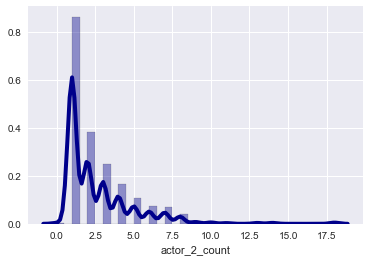

Feature description: actor_3_count
    Number of unique values: 9
    Data complete!
--------------------
mode       1
count    4919.000000
mean        1.930880
std         1.369102
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: actor_3_count, dtype: float64


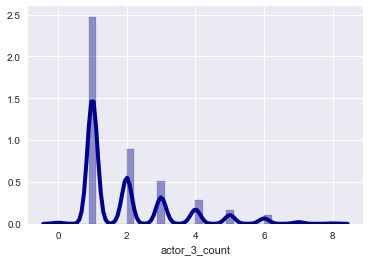

In [21]:
for feature in quantity:
    describe_quantity(dataset, feature)

### Quantitive data analysis:
For clustering problem I will have to go through following steps:
-  handling missing data
-  standarization
-  outliers detection and removal<br>

After that I can look into correlation between data and remove features with high enough correlation to some other features.

#### Missing data
For handling missing data, I decided to do following:
-  duration - looks nearly like normal distribution, so I will use mean
-  num-critic_for reviews - as we don't know any review for this movie, I'll set it's value to 0
-  director_facebook_likes - missing data will be set to 0
-  actor_1/2/3_facebook_likes - missing data will be set to 0
-  facenumber_in_poster - missing data will be set to 0
-  num_user_for_reviews - missing data will be set to 0
-  gross - I could use either mean, median or mode. As mean is stretched through outliers, I'll use mode. Also we could use linear regression to predict gross (and budget) but I couldn't find good correlation to base this prediction.
-  budget - as above with gross


In [22]:
dataset['duration'].fillna(dataset['duration'].mean(), inplace = True)
dataset['director_facebook_likes'].fillna(0, inplace = True)
dataset['actor_1_facebook_likes'].fillna(0, inplace = True)
dataset['actor_2_facebook_likes'].fillna(0, inplace = True)
dataset['actor_3_facebook_likes'].fillna(0, inplace = True)
dataset['facenumber_in_poster'].fillna(0, inplace = True)
dataset['num_user_for_reviews'].fillna(0, inplace = True)
dataset['num_critic_for_reviews'].fillna(0, inplace = True)
dataset['gross'].fillna(dataset['gross'].mode()[0], inplace = True)
dataset['budget'].fillna(dataset['budget'].mode()[0], inplace = True)

#### Outliers detection and removal
I know two main methods of outliers detection:
-  IRQ - anything outside of range <Q1 - 1.5 IRQ; Q3 + 1.5 IRQ> gets deleted
-  Z score - anything outside of range <-3; 3> of Z score gets deleted 
<br>

I've tried both methods below, unfortunatelly IRQ method removes too much data - almost 60% od records. So I will use Z score method in further analysis.

There is also an option of scaling outliers or rather flattening them, but I'm not sure if this method can be used here.

In [23]:
Q1 = dataset[quantity].quantile(0.25)
Q3 = dataset[quantity].quantile(0.75)
IQR = Q3 - Q1
df_IRQ = dataset[quantity][~((dataset[quantity] < (Q1 - 1.5 * IQR)) |(dataset[quantity] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_IRQ.shape


(2017, 19)

In [24]:
from scipy import stats
z = np.abs(stats.zscore(dataset[quantity]))
df_Z = dataset[quantity][(z < 3).all(axis=1)]
df_Z.shape

(3897, 19)

In [25]:
dataframe = df_Z
features = quantity

#### Correlation analysis and pairplots
Next I will analyse correlations between features. Our goal is to identify features which do not really create much value for clustering analysis and features which strongly correlate with others. We need to remove features with strong correlation because it will affect clustering algorithm.

In [26]:
def correlation_chart(df, columns):
    corr = df[columns].corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(15, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

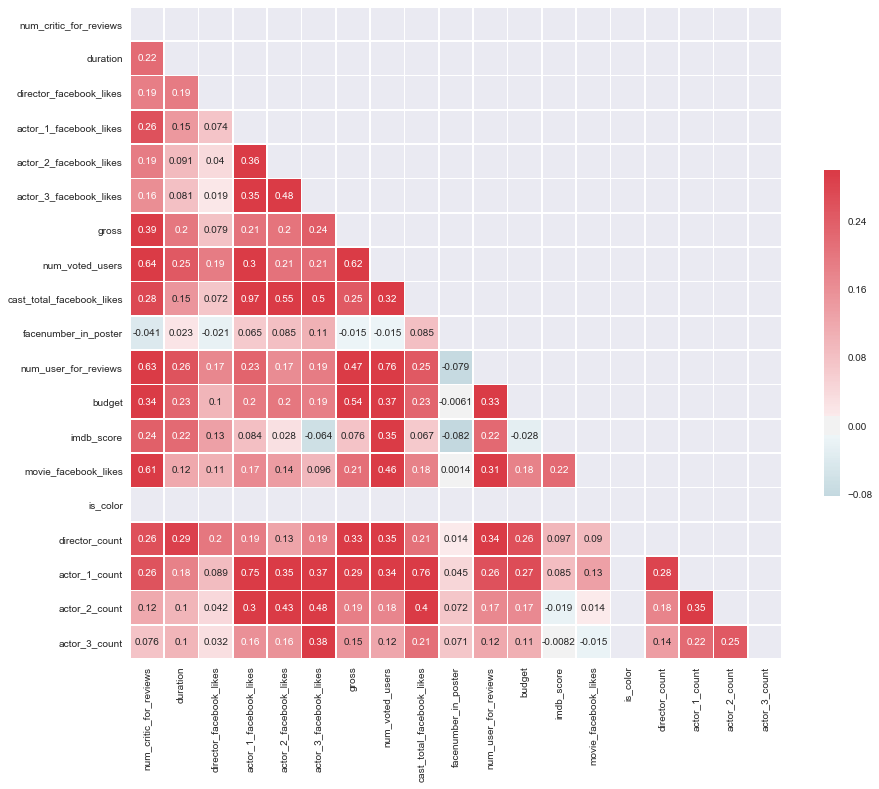

In [27]:
correlation_chart(dataframe[features], dataframe[features].columns)

From this chart we can draw already some conclusions:
-  is_color doesn't really have any predictive value, we'll drop this from our analysis
-  there are some strong correlations between cast_total_facebook_likes and some other features, more analysis below
-  num_user_for_reviews also correlates strongly with num_voted users

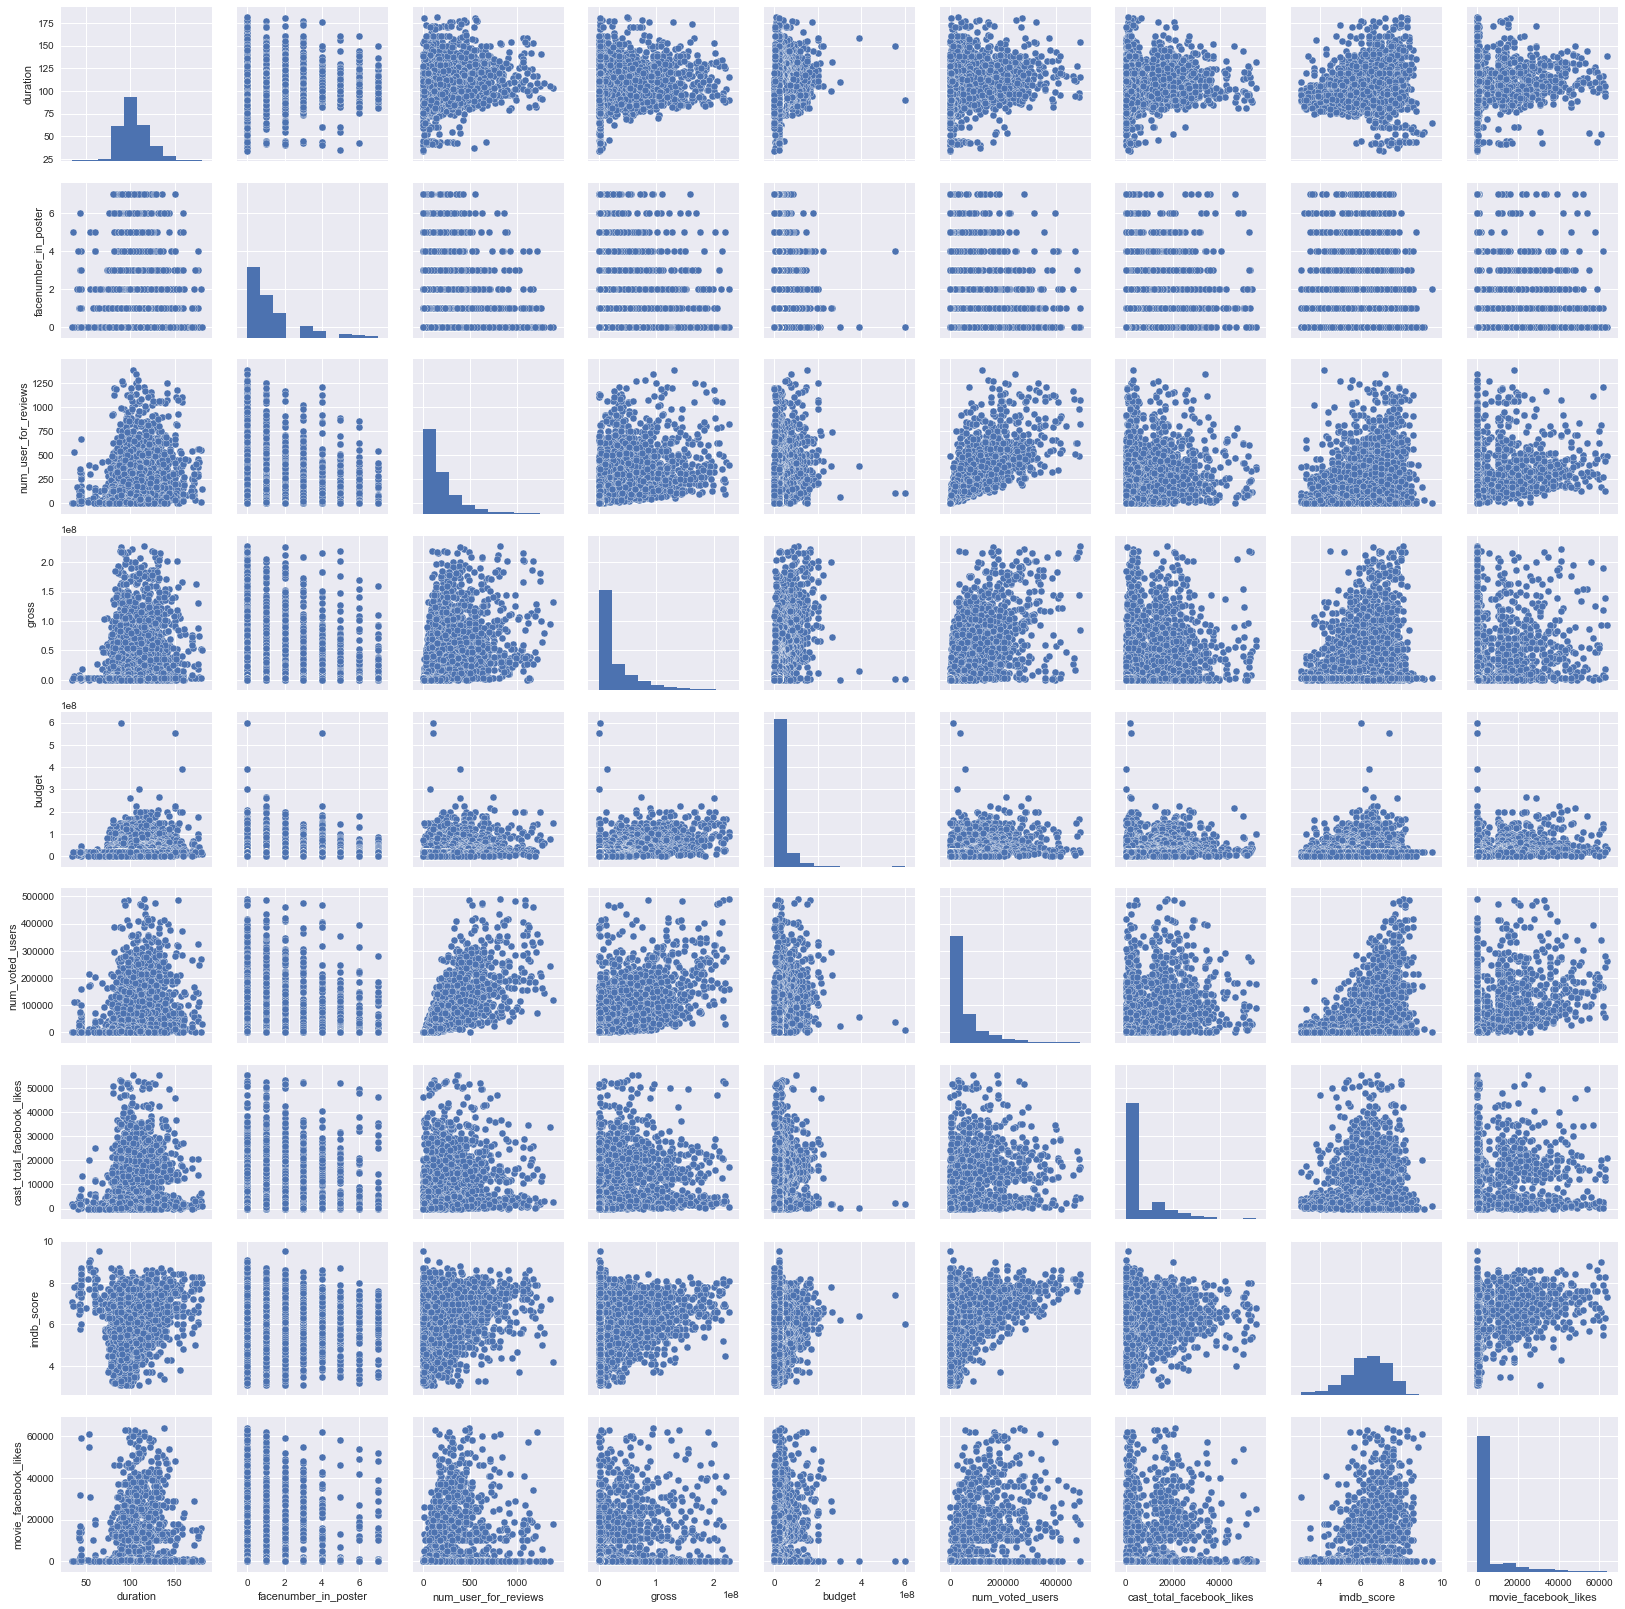

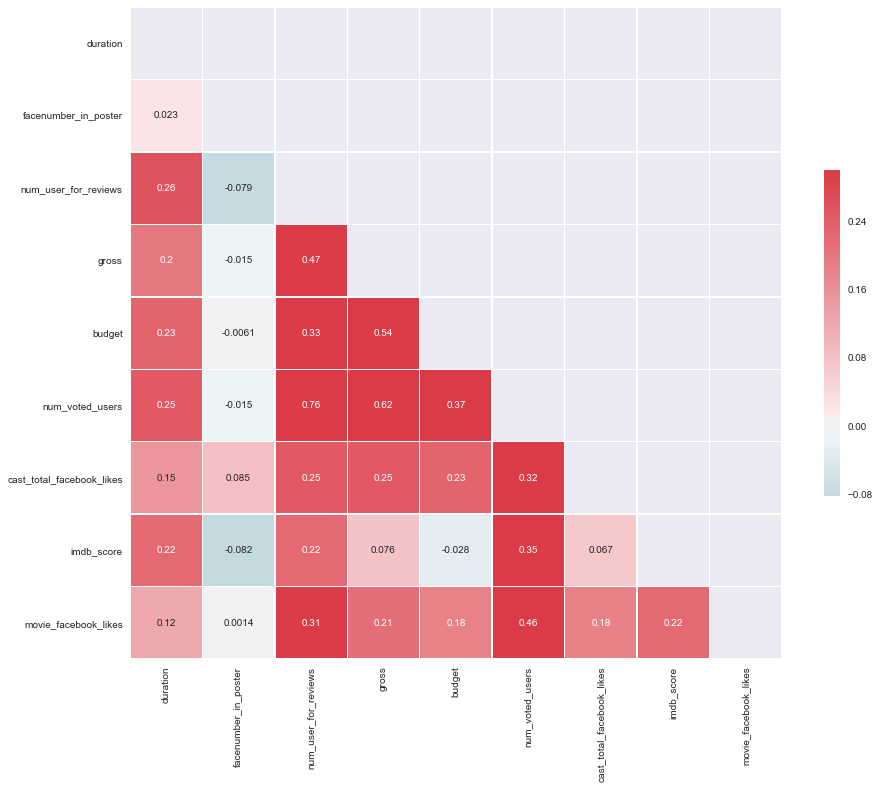

In [28]:
columns = ['duration','facenumber_in_poster', 'num_user_for_reviews', 'gross', 'budget', 'num_voted_users', \
           'cast_total_facebook_likes', 'imdb_score', 'movie_facebook_likes']
sns.pairplot(dataframe[columns])
correlation_chart(dataframe, columns)
plt.show()

-  facenumber_in_poster has too few values and clusters the dataset too much to be included in further analysis
-  num_voted_users correlates very strongly with num_user_for_reviews and gross, so we can remove it from dataset for clustering

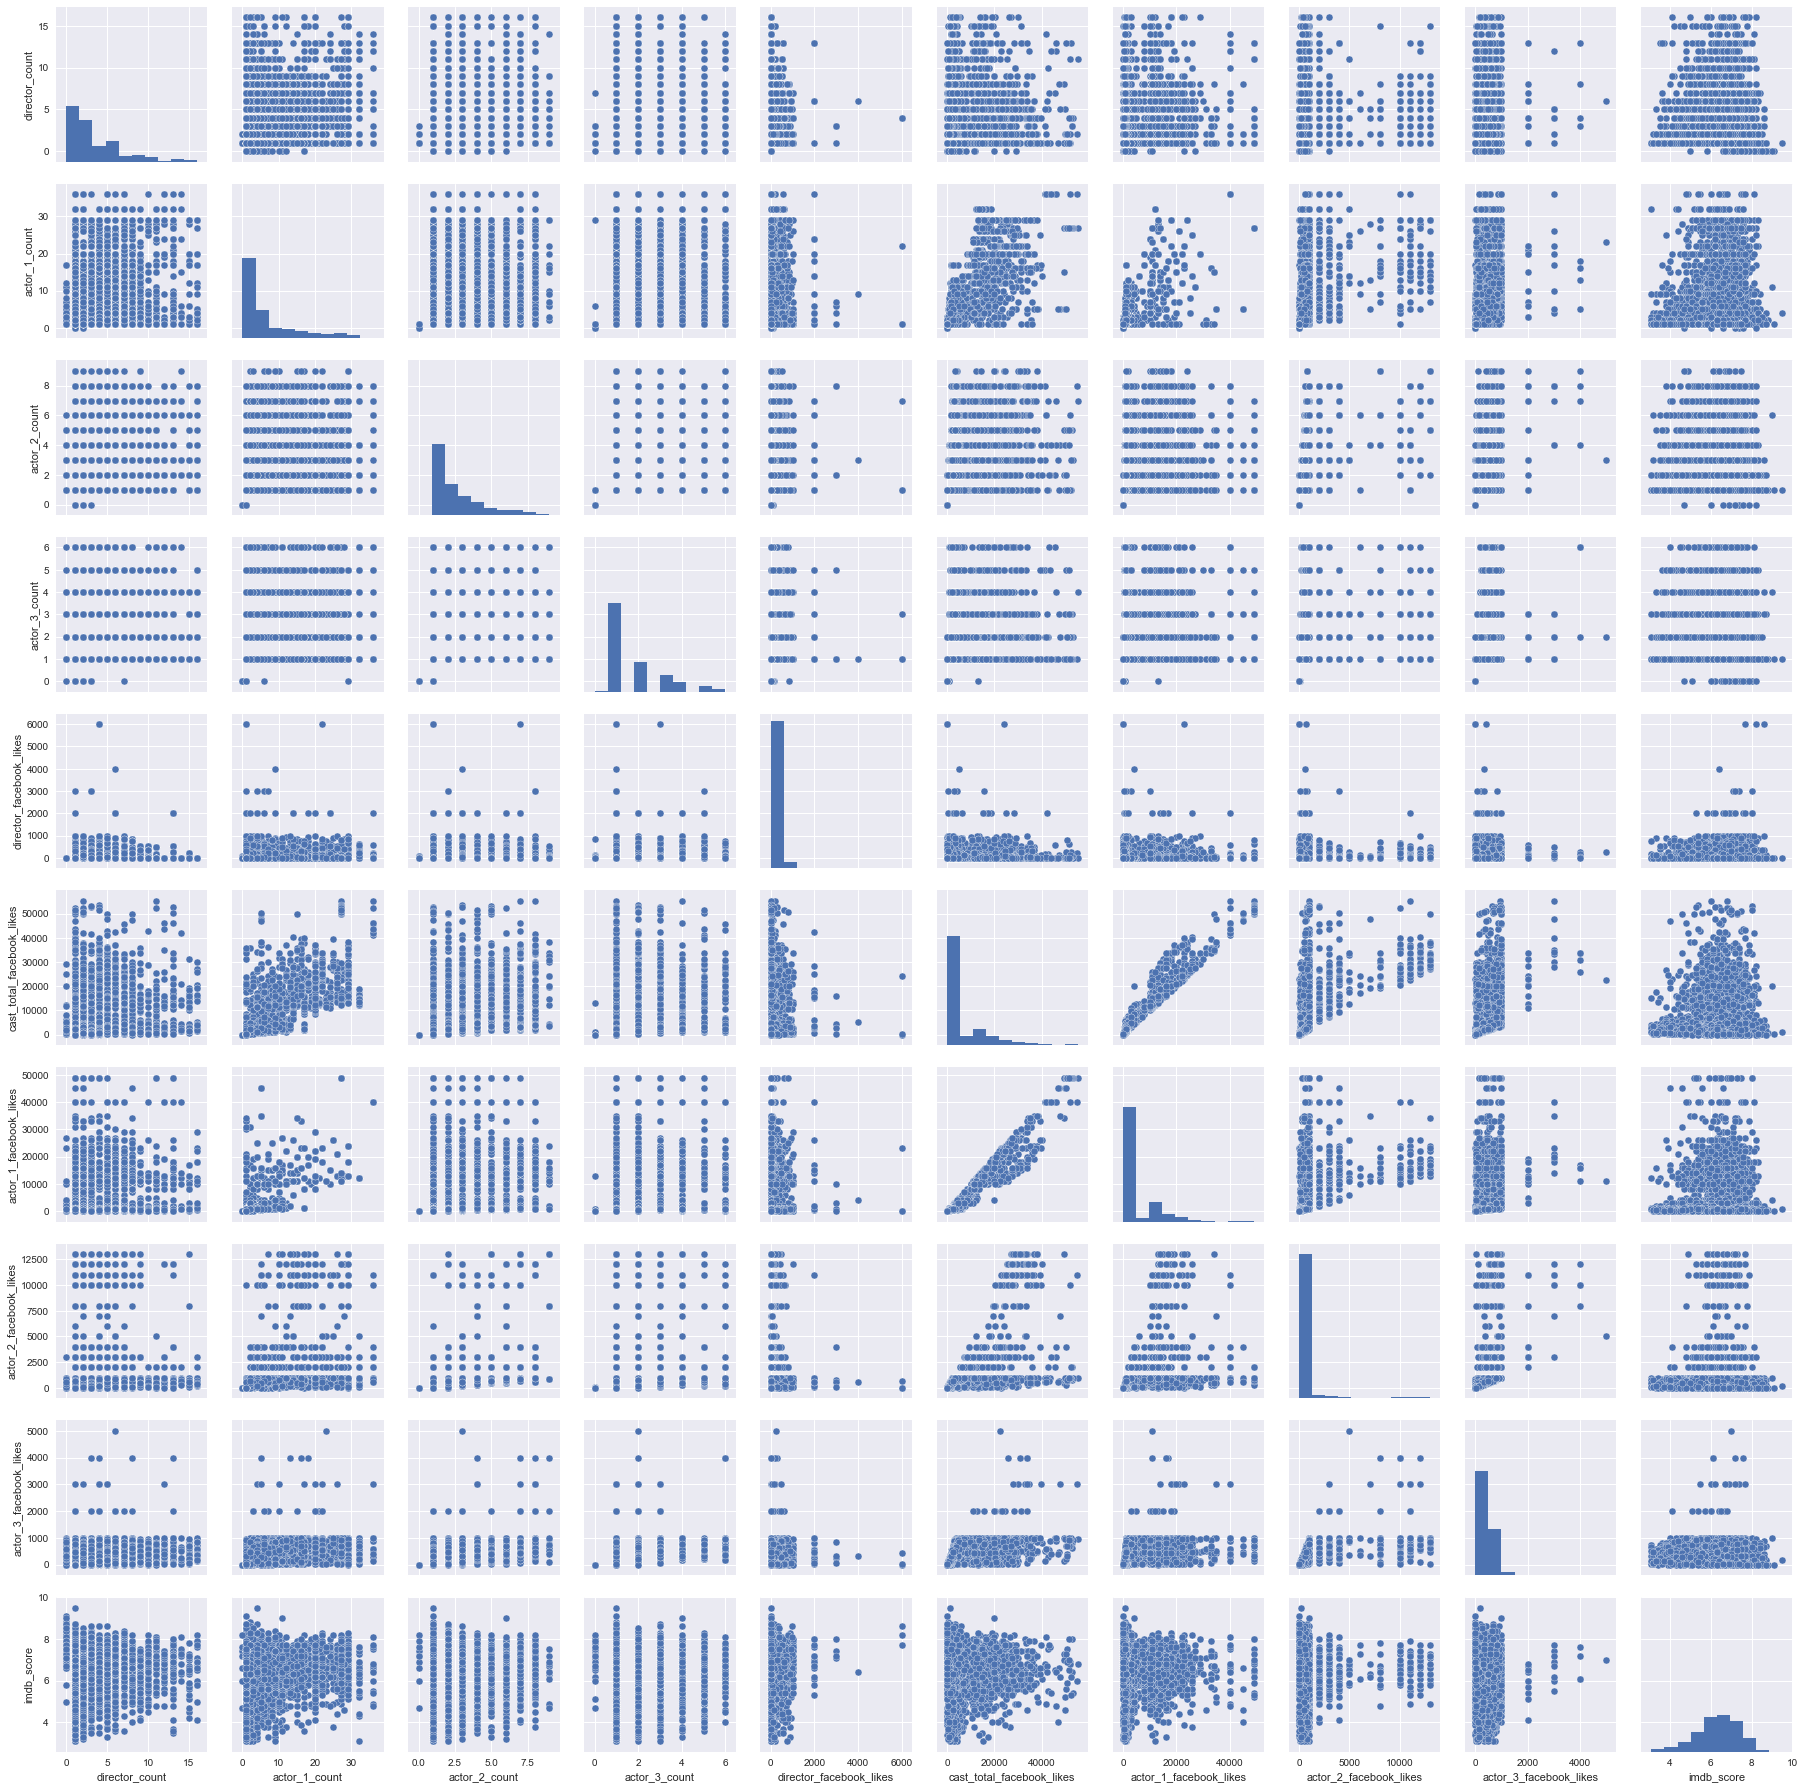

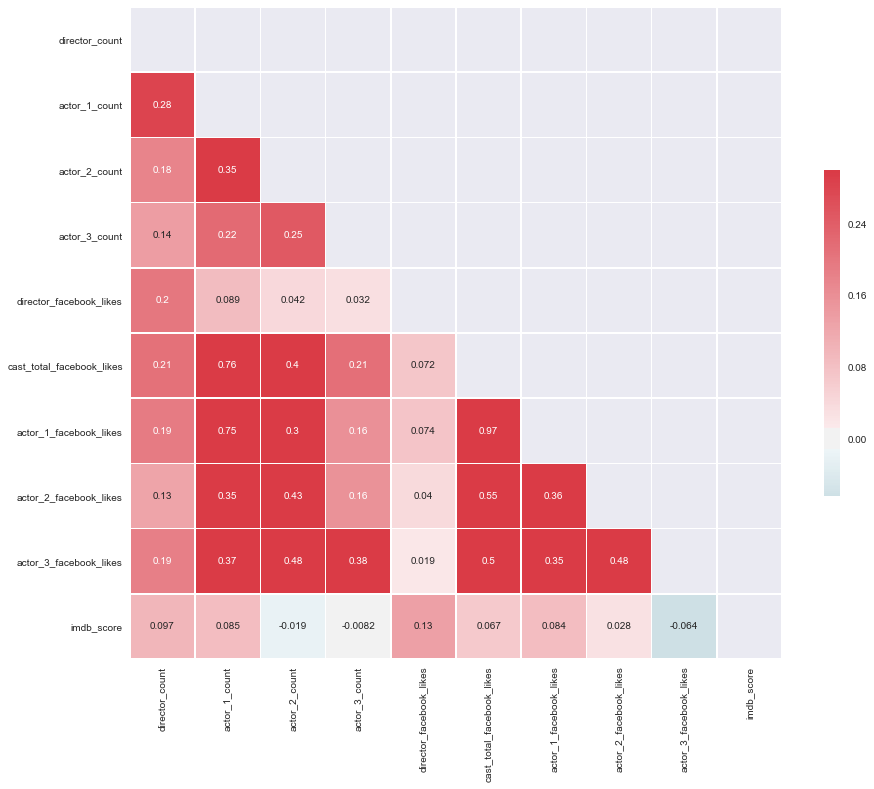

In [29]:
columns = ['director_count', 'actor_1_count', 'actor_2_count', 'actor_3_count', 'director_facebook_likes', \
           'cast_total_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', \
           'imdb_score']
sns.pairplot(dataframe[columns])
correlation_chart(dataframe, columns)
plt.show()

-  actor_1_count correlates strongly with both cast_total_facebook_likes and actor_1_facebook_likes.
-  actor_2_count and actor_3_count do not have such strong correlations, but have very few values and fracture the dataset, so I will be removing them before clustering
-  I don't know what exactly to do with director_count, my intuition tells me it should not be included in further analysis, it's too dependent on the dataset itself and we got another feature measuring popularity of the director (director_facebook_likes)
-  actor_1_facebook_likes has strong correlation with cast_total_facebook_likes, so I can safely remove it. Although actor_2 and actor_3 facebook_likes have this correlation much weaker, I don't think we should keep them in dataset if we remove actor_1_facebook_likes

Final list of features for analysis:

In [30]:
features = ['duration','num_user_for_reviews', 'gross', 'budget', 'cast_total_facebook_likes', 'imdb_score', \
            'movie_facebook_likes', 'director_facebook_likes']

#### Standarization
I'm using scikit StandardScaler for smart scaling - as there are no outliers in this data it will not affect standarization.

In [31]:
scaler = preprocessing.StandardScaler()
names = dataframe[features].columns

scaled_dataset = scaler.fit_transform(dataframe[features])
scaled_dataset = pd.DataFrame(scaled_dataset, columns=names)

# 2. Techniques for dimensiality reduction

There are many different types of data dimensionality reduction methods. Often they depend on type of algorithms later used to analyse data. In this case I'm preparing data for clustering algorithm.
- feature removal<br>
In some cases it's safe to remove a feature from dataset. Usually it's based on several cases:
 - too much missing data - if there's roughly 50% or more of missing values, this feature is usually unusable for machine learning
 - low variance - if all values for a feature are the same or very similar, we can usually remove this feature
 - high correlation - if a feature is in high correlation with a different one, it can be removed
 - incorrect data type for chosen ML task - some data just doesn't work with certain ML algorithms. Qualitative data often needs to be encoded in some way which might lead to unnecessery explosion of features. It's then better to not use this feature.
<br>
- feature engineering<br>
In this case we build a new feature based on few others. Like summing certain information in two columns and using it as a new feature. This also reduces dimensiality of the data
<br>
-  Principal Component Analysis (PCA)
it's an algorithm which transforms a set of variables into a linear combination of lower number of variables. They are obtained in such a way that first principle component accounts for most of the possible variation of original data. After that each succeeding component has the highest possible variance. This way we can reduce dimensiality of the data without loosing much of the variance in dataset.<br>
PCA is sensitive to scales of data so it should be used on standarized features.<br>
PCA can be also used to visualize information - once we have finished clustering on dataset with 8 features, we can use PCA to reduce dimensiality to 3 (or 2) for easier visualisation.
<br>

In this dataset I used exlusively feature removal - both due to low variance (Color), high correlation (num_user_for_reviews and num_voted_users) and in some cases because qualitative data was not suitable for conversion (genres). 